# Swan data structure

A SwanGraph consists of several different parts that can be used individually. This page serves as an overview of several of the important features of a SwanGraph.



## Table of contents

* [Genomic location information](data_structure.md#loc_df)
* [Intron / exon information](data_structure#edge_df)
* [Transcript information](data_structure#t_df)
* [AnnData](data_structure#anndata)
* [Current plotted graph information](data_structure#pg)


We'll be using the same SwanGraph from the rest of the tutorial to examine how data is stored in the SwanGraph. Load it using the following code:

In [47]:
import swan_vis as swan

# code to download this data is in the Getting started tutorial
sg = swan.read('../tutorials/data/swan.p')

Read in graph from ../tutorials/data/swan.p


##  <a name="loc_df"></a>Genomic location information

Swan stores information on individual genomic locations that eventually are plotted as nodes in the SwanGraph in the `SwanGraph.loc_df` pandas DataFrame. The information in the DataFrame and the column names are described below:
* chromosomal coordinates (chrom, coord)
* whether or not the genomic location is present in the provided reference annotation (annotation)
* what role the location plays in the transcript(s) that it is part of (internal, TSS, TES)
* internal identifier in the SwanGraph (vertex_id)

In [4]:
sg.loc_df.head()

,chrom,coord,vertex_id,annotation,internal,TSS,TES
vertex_id,,,,,,,
0,chr1,11869,0,True,False,True,False
1,chr1,12010,1,True,False,True,False
2,chr1,12057,2,True,True,False,False
3,chr1,12179,3,True,True,False,False
4,chr1,12227,4,True,True,False,False


##  <a name="edge_df"></a>Intron / exon location information

Swan stores information about the exons and introns that are eventually plotted as edges in the SwanGraph in the `SwanGraph.edge_df` pandas DataFrame. The information in the DataFrame and the column names are described below:
* internal vertex ids from `SwanGraph.loc_df` that bound each edge (v1, v2)
* strand that this edge is from (strand)
* whether this edge is an intron or an exon (edge_type)
* whether or not the edge is present in the provided reference annotation (annotation)
* internal identifier in the SwanGraph (edge_id)

In [6]:
sg.edge_df.head()

,v1,v2,strand,edge_type,edge_id,annotation
edge_id,,,,,,
0,0,4,+,exon,0,True
5,1,2,+,exon,5,True
6,2,3,+,intron,6,True
7,3,4,+,exon,7,True
1,4,5,+,intron,1,True


##  <a name="t_df"></a>Transcript information

Swan stores information about the transcripts from the annotation and added transcriptome in the `SwanGraph.t_df` pandas DataFrame. The information in the DataFrame and the column names are described below:
* transcript ID from the GTF (tid)
* transcript name from the GTF, if provided (tname)
* gene ID from the GTF (gid)
* gene name from the GTF, if provided (gname)
* path of edges (edge_ids from `SwanGraph.edge_df`) that make up the transcript (path)
* path of genomic locations (vertex_ids fom `SwanGraph.loc_df`) that make up the transcript (loc_path)
* whether or not the transcript is present in the provided reference annotation (annotation)
* novelty category of the transcript, if provided (novelty)

In [8]:
sg.t_df.head()

,tname,gid,gname,path,tid,loc_path,annotation,novelty
tid,,,,,,,,
ENST00000000233.9,ARF5-201,ENSG00000004059.10,ARF5,"[377467, 377468, 377469, 377470, 377471, 37747...",ENST00000000233.9,"[827256, 827261, 827264, 827265, 827266, 82726...",True,Known
ENST00000000412.7,M6PR-201,ENSG00000003056.7,M6PR,"[555507, 555495, 555496, 555497, 555498, 55550...",ENST00000000412.7,"[184557, 184551, 184547, 184542, 184541, 18453...",True,Known
ENST00000000442.10,ESRRA-201,ENSG00000173153.13,ESRRA,"[520219, 520207, 520208, 520209, 520210, 52021...",ENST00000000442.10,"[149944, 149946, 149951, 149952, 149955, 14995...",True,Known
ENST00000001008.5,FKBP4-201,ENSG00000004478.7,FKBP4,"[550369, 550370, 550371, 550372, 550373, 55037...",ENST00000001008.5,"[179573, 179578, 179588, 179591, 179592, 17959...",True,Known
ENST00000001146.6,CYP26B1-201,ENSG00000003137.8,CYP26B1,"[111085, 111086, 111087, 111088, 111078, 11107...",ENST00000001146.6,"[510480, 510478, 510476, 510475, 510472, 51047...",True,Known


##  <a name="anndata"></a>AnnData

Swan stores abundance information for transcripts, TSSs, TESs, and edges using the [AnnData](https://anndata.readthedocs.io/en/latest/) data format. This allows for tracking of abundance information using multiple metrics, storage of complex metadata, and direct compatibility with plotting and analysis using [Scanpy](https://scanpy.readthedocs.io/en/stable/index.html). Since there's a lot of information online about these data formats, I'll just go over the specifics that Swan uses.

### General AnnData format

The basic AnnData format is comprised of:
* `AnnData.obs` - pandas DataFrame - information and metadata about the samples / cells / datasets
* `AnnData.var` - pandas DataFrame - information about the variables being measured (ie genes, transcripts etc.)
* `AnnData.X` - numpy array - information about expression of each variable in each sample

In Swan, the expression data is stored in three different formats that can be accessed through different layers:
* `AnnData.layers['counts']` - raw counts of each variable in each sample
* `AnnData.layers['tpm']` - transcripts per million calculated per sample
* `AnnData.layers['pi']` - percent isoform use per gene (only calculated for transcripts, TSS, TES)

### Transcript AnnData

You can access transcript expression information using `SwanGraph.adata`.

The variable information stored is just the transcript ID but can be merged with `SwanGraph.t_df` for more information.

In [15]:
sg.adata.var.head()

,tid
tid,
ENST00000000233.9,ENST00000000233.9
ENST00000000412.7,ENST00000000412.7
ENST00000000442.10,ENST00000000442.10
ENST00000001008.5,ENST00000001008.5
ENST00000001146.6,ENST00000001146.6


The metadata information that has been added to the SwanGraph along with the initial dataset name from the column names of the added abundance table.

In [16]:
sg.adata.obs.head()

,dataset,cell_line,replicate,cell_line_replicate
index,,,,
hepg2_1,hepg2_1,hepg2,1,hepg2_1
hepg2_2,hepg2_2,hepg2,2,hepg2_2
hffc6_1,hffc6_1,hffc6,1,hffc6_1
hffc6_2,hffc6_2,hffc6,2,hffc6_2
hffc6_3,hffc6_3,hffc6,3,hffc6_3


The expression information are stored in `SwanGraph.adata.layers['counts']`, `SwanGraph.adata.layers['tpm']`, and `SwanGraph.adata.layers['pi']` for raw counts, TPM, and percent isoform (pi) respectively. 

In [48]:
print(sg.adata.layers['counts'][:5, :5])
print(sg.adata.layers['tpm'][:5, :5])
print(sg.adata.layers['pi'][:5, :5])

[[ 98.  43.   4.  23.   0.]
 [207.  66.   6.  52.   0.]
 [100. 148.   0.  82.   0.]
 [108. 191.   0.  98.   0.]
 [ 91. 168.   2. 106.   0.]]
[[196.13847    86.06076     8.005652   46.032497    0.       ]
 [243.97517    77.789185    7.071744   61.28845     0.       ]
 [131.32097   194.35504     0.        107.6832      0.       ]
 [137.06158   242.39594     0.        124.37069     0.       ]
 [147.9865    273.20584     3.2524502 172.37987     0.       ]]
[[100.       100.       100.       100.         0.      ]
 [ 99.519226 100.        60.000004 100.         0.      ]
 [ 98.039215 100.         0.       100.         0.      ]
 [ 99.08257  100.         0.       100.         0.      ]
 [100.       100.       100.       100.         0.      ]]


### Edge AnnData

You can access edge expression information using `SwanGraph.edge_adata`.

The variable information stored is just the edge ID but can be merged with `SwanGraph.edge_df` for more information.

In [49]:
sg.edge_adata.var.head()

,edge_id
edge_id,
0,0
5,5
6,6
7,7
1,1


The metadata information that has been added to the SwanGraph along with the initial dataset name from the column names of the added abundance table. It should be identical to `SwanGraph.adata.obs`.

In [50]:
sg.edge_adata.obs.head()

,dataset,cell_line,replicate
index,,,
hepg2_1,hepg2_1,hepg2,1
hepg2_2,hepg2_2,hepg2,2
hffc6_1,hffc6_1,hffc6,1
hffc6_2,hffc6_2,hffc6,2
hffc6_3,hffc6_3,hffc6,3


And similarly, counts and TPM of each edge are stored in `SwanGraph.edge_adata.layers['counts']` and `SwanGraph.edge_adata.layers['tpm']`. This data is very sparse though so it shows up as all zeroes here!

In [51]:
print(sg.edge_adata.layers['counts'][:5, :5])
print(sg.edge_adata.layers['tpm'][:5, :5])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### TSS / TES AnnData

You can access TSS and TES expression information using `SwanGraph.tss_adata` and `SwanGraph.tes_adata` respectively.

Unlike the other AnnDatas for edge and transcript expression, the `AnnData.var` table hold more information:
* automatically-generated TSS or TES id, which is made up of the gene ID the TSS or TES belongs to and its number (tss_id or tes_id)
* gene ID that the TSS / TES belongs to (gid)
* gene name that the TSS / TES belongs to, if provided (gname)
* vertex ID from `SwanGraph.loc_df` that the TSS / TES came from (vertex_id)
* automatically-generated TSS or TES id, which is made up of the gene name (if provided) that the TSS or TES belongs to and its number (tss_name or tes_name)

In [52]:
print(sg.tss_adata.var.head())
print(sg.tes_adata.var.head())

                                     gid   gname  vertex_id  tss_name
tss_id                                                               
ENSG00000000003.14_1  ENSG00000000003.14  TSPAN6     926111  TSPAN6_1
ENSG00000000003.14_2  ENSG00000000003.14  TSPAN6     926112  TSPAN6_2
ENSG00000000003.14_3  ENSG00000000003.14  TSPAN6     926114  TSPAN6_3
ENSG00000000003.14_4  ENSG00000000003.14  TSPAN6     926117  TSPAN6_4
ENSG00000000005.5_1    ENSG00000000005.5    TNMD     926077    TNMD_1
                                     gid   gname  vertex_id  tes_name
tes_id                                                               
ENSG00000000003.14_1  ENSG00000000003.14  TSPAN6     926092  TSPAN6_1
ENSG00000000003.14_2  ENSG00000000003.14  TSPAN6     926093  TSPAN6_2
ENSG00000000003.14_3  ENSG00000000003.14  TSPAN6     926097  TSPAN6_3
ENSG00000000003.14_4  ENSG00000000003.14  TSPAN6     926100  TSPAN6_4
ENSG00000000003.14_5  ENSG00000000003.14  TSPAN6     926103  TSPAN6_5


Again the metadata in `SwanGraph.tss_adata` and `SwanGraph.tes_adata` should be identical to the metadata in the other AnnDatas.

In [53]:
print(sg.tss_adata.obs.head())
print(sg.tes_adata.obs.head())

         dataset cell_line replicate
index                               
hepg2_1  hepg2_1     hepg2         1
hepg2_2  hepg2_2     hepg2         2
hffc6_1  hffc6_1     hffc6         1
hffc6_2  hffc6_2     hffc6         2
hffc6_3  hffc6_3     hffc6         3
         dataset cell_line replicate
index                               
hepg2_1  hepg2_1     hepg2         1
hepg2_2  hepg2_2     hepg2         2
hffc6_1  hffc6_1     hffc6         1
hffc6_2  hffc6_2     hffc6         2
hffc6_3  hffc6_3     hffc6         3


And finally, expression data for each TSS / TES are stored in the following layers: 
`SwanGraph.tss_adata.layers['counts']`, `SwanGraph.tss_adata.layers['tpm']`, `SwanGraph.tss_adata.layers['pi']`, `SwanGraph.tes_adata.layers['counts']`, `SwanGraph.tes_adata.layers['tpm']`, `SwanGraph.tes_adata.layers['pi']`

In [58]:
r = 5
start_c = 20
end_c = 25
print(sg.tss_adata.layers['counts'][:r, start_c:end_c])
print(sg.tss_adata.layers['tpm'][:r, start_c:end_c])
print(sg.tss_adata.layers['pi'][:r, start_c:end_c])
print()
print(sg.tes_adata.layers['counts'][:r, start_c:end_c])
print(sg.tes_adata.layers['tpm'][:r, start_c:end_c])
print(sg.tes_adata.layers['pi'][:r, start_c:end_c])

[[  0.   0.   0.   0. 129.]
 [  0.   0.   0.   0. 323.]
 [  9.   0.   0.   0. 212.]
 [ 16.   0.   0.   0. 173.]
 [  7.   0.   0.   0. 123.]]
[[  0.         0.         0.         0.       258.18228 ]
 [  0.         0.         0.         0.       380.69556 ]
 [ 11.818888   0.         0.         0.       278.40045 ]
 [ 20.305418   0.         0.         0.       219.55234 ]
 [ 11.383576   0.         0.         0.       200.0257  ]]
[[  0.   0.   0.   0. 100.]
 [  0.   0.   0.   0. 100.]
 [100.   0.   0.   0. 100.]
 [100.   0.   0.   0. 100.]
 [100.   0.   0.   0. 100.]]

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        0.        0.        0.        0.       ]
 [0.        1.6262251 0.        0.        0.       ]]
[[  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.  

##  <a name="pg"></a>Current plotted graph information

To reduce run time for generating gene reports, Swan stores the subgraph that is used to generate plots for any specific gene in `SwanGraph.pg`. This object is very similar to the parent `SwanGraph` object. It has a `loc_df`, `edge_df`, and `t_df` that just consist of the nodes, edges, and transcripts that make up a specific gene. This data structure can be helpful for understanding what is going on in generated plots as the node labels are not consistent with the display labels in Swan plots.

For instance, let's again plot ADRM1.

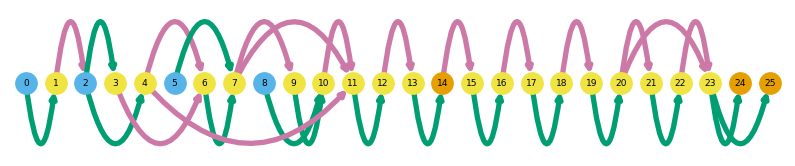

In [59]:
sg.plot_graph('ADRM1')

In `SwanGraph.pg.loc_df`, you can see what genomic location each node plotted in the gene's graph corresponds to:

In [61]:
sg.pg.loc_df.head()

,chrom,coord,vertex_id,annotation,internal,TSS,TES,color,edgecolor,linewidth
vertex_id,,,,,,,,,,
0,chr20,62302093,0,True,False,True,False,tss,None,None
1,chr20,62302142,1,True,True,False,False,internal,None,None
2,chr20,62302896,2,True,True,True,False,tss,None,None
3,chr20,62303045,3,False,True,False,False,internal,None,None
4,chr20,62303049,4,True,True,False,False,internal,None,None


In `SwanGraph.pg.edge_df`, you can see information about each edge, indexed by the subgraph vertex IDs from `SwanGraph.pg.loc_df`:

In [63]:
sg.pg.edge_df.head()

,v1,v2,strand,edge_type,edge_id,annotation,curve,color,line
edge_id,,,,,,,,,
884037,0,1,+,exon,884037,True,"arc3,rad=4.000000000000002",exon,None
884038,1,2,+,intron,884038,True,"arc3,rad=-3.9999999999999964",intron,None
884039,2,4,+,exon,884039,True,"arc3,rad=1.9999999999999996",exon,None
884040,4,6,+,intron,884040,True,"arc3,rad=-2.000000000000001",intron,None
884041,6,7,+,exon,884041,True,"arc3,rad=3.9999999999999964",exon,None


And finally, `SwanGraph.pg.t_df` holds the information about each transcript in the gene:

In [65]:
sg.pg.t_df.head()

,tname,gid,gname,path,tid,loc_path,annotation,novelty
tid,,,,,,,,
ENST00000253003.6,ADRM1-201,ENSG00000130706.12,ADRM1,"[884039, 884040, 884041, 884042, 884043, 88404...",ENST00000253003.6,"[2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17...",True,Known
ENST00000462554.2,ADRM1-202,ENSG00000130706.12,ADRM1,"[884060, 884058, 884045, 884046, 884047]",ENST00000462554.2,"[5, 7, 11, 12, 13, 14]",True,Known
ENST00000465805.2,ADRM1-203,ENSG00000130706.12,ADRM1,"[884061, 884044, 884045, 884046, 884047]",ENST00000465805.2,"[8, 10, 11, 12, 13, 14]",True,Known
ENST00000491935.5,ADRM1-204,ENSG00000130706.12,ADRM1,"[884037, 884038, 884039, 884040, 884041, 88404...",ENST00000491935.5,"[0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, ...",True,Known
ENST00000620230.4,ADRM1-205,ENSG00000130706.12,ADRM1,"[884039, 884040, 884041, 884058, 884045, 88404...",ENST00000620230.4,"[2, 4, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18, 1...",True,Known
